## Week 4 

## T - testing and Inferential Statistics

Most people turn to IMB SPSS for T-testings, but this programme is very expensive, very old and not really necessary if you have access to Python tools. Very focused on click and point and is probably more useful to people without a programming background. 

### Libraries

In [43]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
import scipy.stats as ss
import statsmodels.stats.weightstats as sm_ttest

### Reading 

* [Independent t-test using SPSS Statistics on laerd.com](https://statistics.laerd.com/spss-tutorials/independent-t-test-using-spss-statistics.php)
* [ScipyStats documentation on ttest_ind](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html)
* [StatsModels documentation on ttest_ind](https://www.statsmodels.org/devel/generated/statsmodels.stats.weightstats.ttest_ind.html)
* [StarTek.com, Hypothesis test: The Difference in Means](https://stattrek.com/hypothesis-test/difference-in-means.aspx)
* [Python for Data Science, Independent T-Test](https://pythonfordatascience.org/independent-t-test-python/)
* [Dependent t-test using SPSS Statistics on leard.com](https://statistics.laerd.com/spss-tutorials/dependent-t-test-using-spss-statistics.php)
* [StackExchange, When conducting a t-test why would one prefer to assume (or test for) equal variances..?](https://stats.stackexchange.com/questions/305/when-conducting-a-t-test-why-would-one-prefer-to-assume-or-test-for-equal-vari)

## T-testing

**Example:** If I take a sample of males and females from the population and calcaulte their heights. Now a question I might ask is, is the mean height of males in the population equal to the mean height of females in the population? 

T-testing is related to Hypothesis Testing. 

### Scipy Stats 

In [11]:
#Generating random data for the heights of 30 males in my sample
m = np.random.normal(1.8, 0.1, 30)

In [10]:
#Generating random data for the heights of 30 females in my sample
f = np.random.normal(1.6, 0.1, 30)

In [12]:
ss.stats.ttest_ind(m, f)

Ttest_indResult(statistic=7.27606004263129, pvalue=1.0072375359890555e-09)

The null hypothesis (H0) claims that the average male height in the population is equal to the average female height in the population. Using my sample, I can infer if the H0 should be accepted or rejected. Based on my very small pvalue, we can reject the null hypothesis. 

The pvalue refers to the probability of finding these samples in two populations with the same mean. 

We have to accept our Alternate Hypothesis (H1), which should claim that the average male height is different to the average female height in the population. This is not surprising as I generated random data for my sample with male heights having a larger mean.

In [25]:
np.mean(m)

1.8044641620041224

In [26]:
np.mean(f)

1.6163813558886588

### Statsmodels

In [31]:
sm_ttest.ttest_ind(m, f)

(7.27606004263129, 1.0072375359890555e-09, 58.0)

## Graphical Analysis

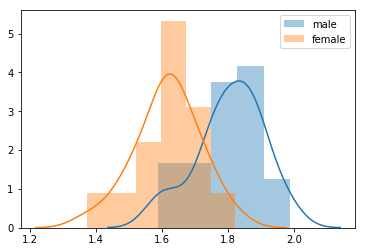

In [79]:
#Seaborn displot to show means
plt.figure()
sns.distplot(m, label = 'male')
sns.distplot(f, label = 'female')
plt.legend();

In [48]:
df = pd.DataFrame({'male': m, 'female': f})
df

,male,female
0,1.959681,1.772277
1,1.744898,1.632061
2,1.872198,1.481597
3,1.831656,1.611231
4,1.726381,1.683262
5,1.940117,1.622314
6,1.586862,1.539130
7,1.655721,1.627496
8,1.897138,1.601524
9,1.819655,1.657074


It's typically not a good idea to list values side by side. It implies a relationship between the data and can lead to problems if we don't have the same sample size of males as females.

In [63]:
a = ['male'] * 30
b = ['female'] * 30
gender = a+b

# I can't add arrays for males and females in the same way
# As they are numpy arrays
height = np.concatenate([m, f])

In [65]:
df = pd.DataFrame({'Gender': gender, 'Height': height})
df

,Gender,Height
0,male,1.959681
1,male,1.744898
2,male,1.872198
3,male,1.831656
4,male,1.726381
5,male,1.940117
6,male,1.586862
7,male,1.655721
8,male,1.897138
9,male,1.819655


In [72]:
#Taking out just the male heights
df[df['Gender'] == 'male']['Height']

0     1.959681
1     1.744898
2     1.872198
3     1.831656
4     1.726381
5     1.940117
6     1.586862
7     1.655721
8     1.897138
9     1.819655
10    1.820204
11    1.887642
12    1.855171
13    1.881107
14    1.798460
15    1.809614
16    1.766730
17    1.726248
18    1.889306
19    1.876844
20    1.801469
21    1.759842
22    1.760740
23    1.862440
24    1.863525
25    1.797440
26    1.593203
27    1.987729
28    1.745976
29    1.615930
Name: Height, dtype: float64

In [74]:
df[df['Gender'] == 'female']['Height']

30    1.772277
31    1.632061
32    1.481597
33    1.611231
34    1.683262
35    1.622314
36    1.539130
37    1.627496
38    1.601524
39    1.657074
40    1.492246
41    1.673924
42    1.371518
43    1.618200
44    1.574618
45    1.709005
46    1.537360
47    1.821667
48    1.732878
49    1.739076
50    1.713418
51    1.631748
52    1.596625
53    1.629548
54    1.617671
55    1.603126
56    1.691172
57    1.525487
58    1.544750
59    1.439436
Name: Height, dtype: float64

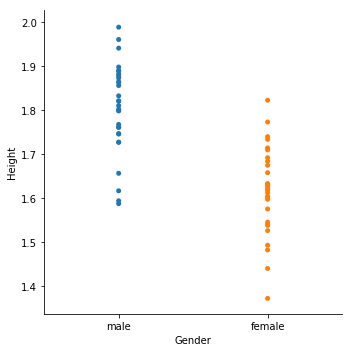

In [83]:
sns.catplot(x = 'Gender', y = 'Height', jitter = False, data = df);

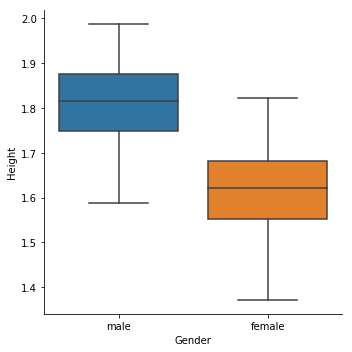

In [81]:
sns.catplot(x = 'Gender', y = 'Height', kind = 'box', data = df);

### Notes

This notebook is related to independent T-testing, or T-testing independent variables. There is a different test for dependent samples. An example of dependent samples T-testing, would example the difference in assessment results before teaching a new concept versus after teaching a new topic. Sometimes refered to as paired samples T-test. 